# Profitable Long Term Investments: An Analysis of American Housing Prices

## Introduction

As real estate can be a finicky industry, it is hugely important to understand where to buy a property and what property type will be the most profitable. In this analysis we will be analyzing property types in cities to determine which property type and location makes the most sense for a long term investment. The property type and location must meet our following requirements:

First, we want to buy a property in a location that is steadily increasing in price, allowing a profit to be made when it is eventually sold. Second, we want to determine which housing types are mispriced within the location chosen from the first requirment. The greater the misprice, the greater the deal may be when compared to the national average. Lastly, due to budgetary reasons we want to buy in a relatively cheap city when compared to the national average.

The data we will be using comes from the [Zillow Home Value Index](https://data.world/realestate/zillow-zip-zhvi). To follow along with this anlysis and run every cell correctly, you will need to download each document and place them in the same folder as this Jupyter Notebook.

### Summary of Results

Upon completion of the analysis, we have found that a Single Family property in Hermosa Beach, California is the best property to invest in given our requirements stated above.

Please refer to the full analysis below for a more in-depth exploration of housing prices and trends throughout America.


## Data Exploration

Each of the property types and supplementary information we mentioned in the introduction are separated into their own documents. In this analysis we will combine all of these so we can access them very easily. 

Let's first explore one of the seven property type documents as they are all very similar to one another.


In [2]:
# Let's read in one of the property type documents and the supplementary documents to get a sense of the data
import pandas as pd

one = pd.read_csv('Zip_Zhvi_1bedroom.csv')

print(one.head(10))

   RegionID  RegionName           City State          Metro     CountyName  \
0     61639       10025       New York    NY       New York       New York   
1     84654       60657        Chicago    IL        Chicago           Cook   
2     61637       10023       New York    NY       New York       New York   
3     84616       60614        Chicago    IL        Chicago           Cook   
4     84640       60640        Chicago    IL        Chicago           Cook   
5     91733       77084        Houston    TX        Houston         Harris   
6     97564       94109  San Francisco    CA  San Francisco  San Francisco   
7     61630       10016       New York    NY       New York       New York   
8     84646       60647        Chicago    IL        Chicago           Cook   
9     74242       37211      Nashville    TN      Nashville       Davidson   

   SizeRank   1996-04   1996-05   1996-06   ...      2016-03   2016-04  \
0         1       NaN       NaN       NaN   ...     736600.0  74110

We can see this document shows monthly housing prices for a one bedroom property type throughout the United States. It looks as if there is some missing data starting in 1996 so the missing values can just be ignored when using this data for statistics.


In [3]:
# Let's read in one more document to ensure that they are the same
two = pd.read_csv('Zip_Zhvi_2bedroom.csv')

print(two.head(10))

   RegionID  RegionName           City State          Metro     CountyName  \
0     61639       10025       New York    NY       New York       New York   
1     84654       60657        Chicago    IL        Chicago           Cook   
2     61637       10023       New York    NY       New York       New York   
3     84616       60614        Chicago    IL        Chicago           Cook   
4     93144       79936        El Paso    TX        El Paso        El Paso   
5     84640       60640        Chicago    IL        Chicago           Cook   
6     91733       77084        Houston    TX        Houston         Harris   
7     97564       94109  San Francisco    CA  San Francisco  San Francisco   
8     91982       77494    Cinco Ranch    TX        Houston      Fort Bend   
9     62087       11375       New York    NY       New York         Queens   

   SizeRank   1996-04   1996-05   1996-06    ...        2016-03    2016-04  \
0         1       NaN       NaN       NaN    ...      1341300.0

This print out shows us that the 2 Bedroom property type documents are all the same, so that makes it fairly easy for us to deal with!

Now, we will need to look at the supplementary document which will help us understand what information is provided in the median value per square foot report.

In [4]:
# Let's read in the first supplementary document
mvpsf = pd.read_csv('Zip_MedianValuePerSqft_AllHomes.csv')

print(mvpsf.head(10))

   RegionID  RegionName           City State              Metro  \
0     61639       10025       New York    NY           New York   
1     84654       60657        Chicago    IL            Chicago   
2     61637       10023       New York    NY           New York   
3     84616       60614        Chicago    IL            Chicago   
4     93144       79936        El Paso    TX            El Paso   
5     61616       10002       New York    NY           New York   
6     84640       60640        Chicago    IL            Chicago   
7     91733       77084        Houston    TX            Houston   
8     97564       94109  San Francisco    CA      San Francisco   
9     90668       75070       McKinney    TX  Dallas-Fort Worth   

      CountyName  SizeRank  1996-04  1996-05  1996-06   ...     2016-03  \
0       New York         1      NaN      NaN      NaN   ...      1305.0   
1           Cook         2    134.0    134.0    133.0   ...       283.0   
2       New York         3      NaN  

This document outlines the median value per square foot for each month throughout various cities in the United states. This period ranges from 1996 to 2016 similarly to the property type document we examined previously.


## Data Analysis

### Data Collection

Now that we have reviewed the data, we need to make sure each of these documents can be accessed easily. To do this, a list of dataframes will be used so that each file can be accessed throughout the analysis. We have already read in the 1 and 2 bedroom property types, as well as the median value per square foot supplemental document. We only need to read in the 5 other property types now.

In [5]:
# Read in the last 5 property types

three = pd.read_csv('Zip_Zhvi_3bedroom.csv') 
four = pd.read_csv('Zip_Zhvi_4bedroom.csv') 
five = pd.read_csv('Zip_Zhvi_5BedroomOrMore.csv') 
condo = pd.read_csv('Zip_Zhvi_Condominum.csv') 
sfr = pd.read_csv('Zip_Zhvi_SingleFamilyResidence.csv') 

data_list = [mvpsf,one,two,three,four,five,condo,sfr]


# The data has now been read in individually and can be called in this order:

# - data_list[0] = Median Value per Square Foot
# - data_list[1] = 1 Bedroom Property
# - data_list[2] = 2 Bedroom Property
# - data_list[3] = 3 Bedroom Property
# - data_list[4] = 4 Bedroom Property
# - data_list[5] = 5 Bedroom Property
# - data_list[6] = Condominium Property
# - data_list[7] = Single Family Residence Property

### Property Types

Now that the data has been read in, let's first look at the changing trends throughout the United States per property type for each month we have data for.

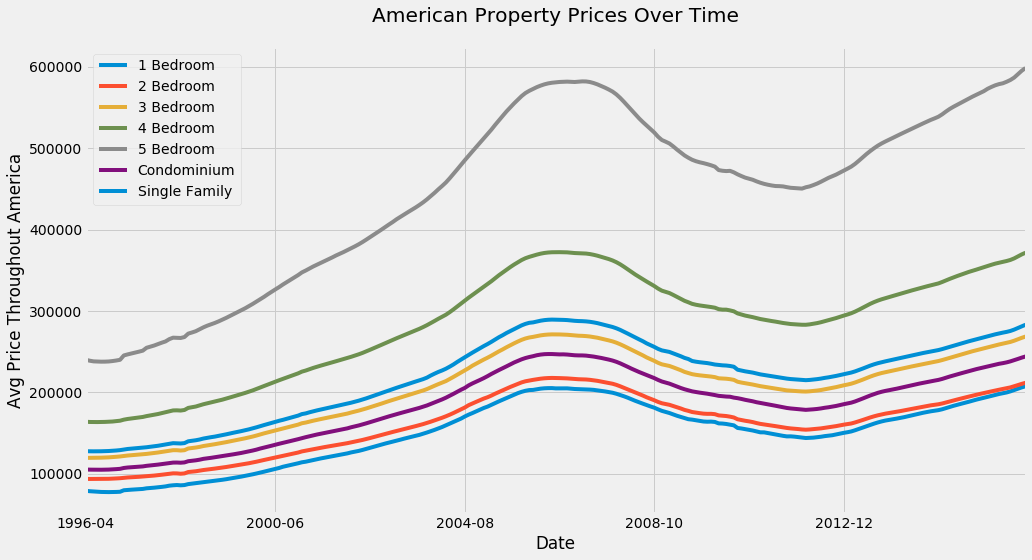

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# Set variables that will be used throughout code
i=1

# Set our property types list so that it will be added when needed.
property_types = ['1 Bedroom','2 Bedroom', '3 Bedroom', '4 Bedroom', '5 Bedroom', 'Condominium', 'Single Family']


while i < len(data_list):
    # Takes mean of each each month in file and keeps only city, and months
    means = data_list[i].mean().drop(['RegionID', 'RegionName', 'SizeRank'], axis = 0) 
    ax = means.plot(figsize = (15,8))
    i += 1
    
ax.set_title("American Property Prices Over Time", y=1.04)
ax.set_xlabel("Date")
ax.set_ylabel("Avg Price Throughout America")
ax.legend(property_types,loc='upper left')
tick_labels = ax.xaxis.get_ticklabels()

plt.show()


In the above graph we can see that the housing market steadily increases from 1996 to roughly 2005. Here is where we start to see the market plateau and eventually crash. This corresponds exactly with the recession America faced at the start of 2008. We can see that just before 2012 the average price for all properties began to increase again and has continued to increase ever since.  

It seems that 4 and 5 bedroom property types have been increasing and decreasing in different rates from the rest of the property types. The 5 bedroom property type seems to be more volatile as it grows and shrinks more rapidly than the rest, with the 4 bedroom property type a close second. The rest of the property types seem to grow and shrink at the same pace as one another.

Lastly, it can be seen that the 3 bedroom property type is the best deal right now. The average price for a 3 bedroom property is roughly 275,000.00 across America. This means that you get more bang for your buck compared to the other houses. For example if you were to buy a 4 bedrooms house you would have to pay roughly 375,000.00 and for a 2 bedroom you would have to pay roughly 210,000.00. for only a 60,000.00 increase you can have 3 bedrooms. However, this does not take into account square footage, as we continue this analysis we may find that the better deal is not the 3 bedroom property

## Ranking Property Types

In this section we will write some code to rank the property types in each city from most expensive to least expensive. Most expensive will have a rank of 1, least expensive will have a rank of 7.

In [7]:
# Initialize starting values that are needed
i=1

# Specify the columns we want to keep
keep_cols = ['City','State', 'Metro', '2016-12']

# Initialize new dataframe
city_rankings = pd.DataFrame()

# Define the method that will calculate the average for each city in the respective dataframes
def calc_avg_city(row):
    latest_data = data_list[i][data_list[i]['City'] == row['City']]['2016-12']
    return latest_data.mean()

# Define the method that will map the correct state to the city
def apply_map_state(row):
    state = data_list[i][data_list[i]['City'] == row['City']]['State']
    return state.iloc[0]

# Define the method that will map the correct metro area to the city
def apply_map_metro(row):
    state = data_list[i][data_list[i]['City'] == row['City']]['Metro']
    return state.iloc[0]

# Complete the following loop for each property type datafile we have
while i < len(data_list)-1: 
    
    # Used to initialize our new dataframe and collect the information we require
    if i == 1:
        city_data = data_list[i][keep_cols]
        unique_data = data_list[i]['City'].unique()
        city_rankings['City'] = unique_data
        city_rankings['State'] = city_rankings.apply(apply_map_state, axis=1)
        city_rankings['Metro'] = city_rankings.apply(apply_map_metro, axis=1)
    
    # calculates average property value per city
    city_rankings[property_types[i-1]] = city_data.apply(calc_avg_city,axis=1)
    
    i += 1

city_rankings_nan = city_rankings

# Fill all NAN values with 0
city_rankings = city_rankings.fillna(value=0)
city_prices = city_rankings

city_rankings.head(20)



,City,State,Metro,1 Bedroom,2 Bedroom,3 Bedroom,4 Bedroom,5 Bedroom,Condominium
0,New York,NY,New York,788726.086957,1.147662e+06,7.797468e+05,6.803700e+05,0.000000e+00,7.646543e+05
1,Chicago,IL,Chicago,191596.296296,2.395844e+05,3.195220e+05,4.097206e+05,4.815059e+05,1.899468e+05
2,Houston,TX,Houston,788726.086957,1.147662e+06,7.797468e+05,6.803700e+05,0.000000e+00,7.646543e+05
3,San Francisco,CA,San Francisco,191596.296296,2.395844e+05,3.195220e+05,4.097206e+05,4.815059e+05,1.899468e+05
4,Nashville,TN,Nashville,191596.296296,2.395844e+05,3.195220e+05,4.097206e+05,4.815059e+05,1.899468e+05
5,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,134550.000000,1.178214e+05,1.451222e+05,2.519229e+05,5.342172e+05,1.208353e+05
6,Washington,DC,Washington,825784.210526,1.186205e+06,1.531161e+06,2.184281e+06,2.819054e+06,1.072267e+06
7,Saint Peters,MO,St. Louis,788726.086957,1.147662e+06,7.797468e+05,6.803700e+05,0.000000e+00,7.646543e+05
8,Hoboken,NJ,New York,191596.296296,2.395844e+05,3.195220e+05,4.097206e+05,4.815059e+05,1.899468e+05
9,Sunny Isles Beach,FL,Miami-Fort Lauderdale,190730.769231,2.108667e+05,2.586154e+05,3.520462e+05,5.531222e+05,2.326737e+05


Here is output of the average values for each property type, per city. We had to consolidate as many cities as we could because there is no point examining any city that doesn't have two or three of the property type data points. On that note, we can see here that any 'NAN' value in the 5 bedroom property type has been filled with 0. This will allow us to still use the majority of the other data. 

We can now complete our rankings with a simple function in the next cell. However, before we move on, it is important to note that because any 'NAN' value has been filled with 0, it is automatically going to come last on the ranking. This means that, as these ranking values are used further down the line, we have to remember that the 5 bedroom type data is skewed.

In [8]:
# Calculates the ranking for the 7 property types, returns an array starting with 1 Bedroom 
# and ends with Single Family Property

new_city_rankings = city_rankings

#print(new_city_rankings.head(10))
property_types = ['1 Bedroom','2 Bedroom', '3 Bedroom', '4 Bedroom', '5 Bedroom', 'Condominium', 'Single Family']
def calc_ranking(row):

    values = row[property_types].rank(axis=0,ascending=False)

    return values

new_city_rankings[property_types] = new_city_rankings.apply(calc_ranking, axis=1)

mean_property_rank = new_city_rankings[property_types].mean()

print(mean_property_rank)


1 Bedroom        5.525692
2 Bedroom        4.300395
3 Bedroom        3.027273
4 Bedroom        2.022925
5 Bedroom        1.445455
Condominium      4.678261
Single Family         NaN
dtype: float64


Here we can see the output form the mean ranking for each property type. Before we examine the results, let's create a graph of this data so we can better visualize it.

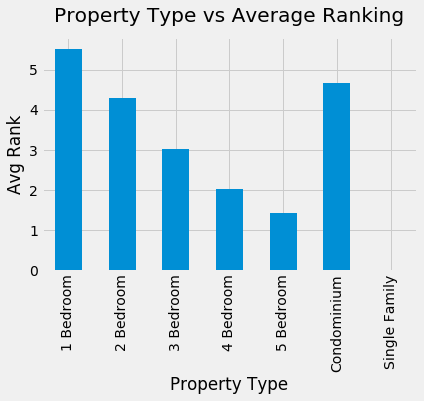

In [9]:
mean_property_rank.plot(kind='bar')
plt.title('Property Type vs Average Ranking', y=1.04)
plt.xlabel("Property Type")
plt.ylabel("Avg Rank")
plt.show()

In this graph we can see that a 5 bedroom property type is the most expensive property type as our scale is from most expensive 1 to least expensive 7. This is definitely counterintuitive because in this graph we would think the best performer is the largest amount, but in fact it is the opposite when we use a ranking system like this.

For the 5 bedroom property type, we can see it is the most expensive property type, however, we do have to careful with this value. Due to any missing values 'NAN', as stated earlier, we know that this is slightly skewed higher because any 'NAN' value had a ranking of 7. This ranking of 7 for some of the cities then skewed the average result causing the value to be higher than it should be if we were to not include the cities that had no data.

If we did not to include these cities that had any 'NAN' values in them, we would not have much data at all, that is why they still need to be included.

In [10]:
# Calculates the typical real estate market for that given city

def calculate_similarity(row, average_ranks):
    #print(row)
    #print(average_ranks)
    return (row - average_ranks).abs().mean()


typical_property_value = new_city_rankings

typical_property_value['Normality'] = typical_property_value[property_types].apply(
    calculate_similarity, args=(mean_property_rank,),axis=1)
                                                                                    
typical_property_value.head(10)                                                                                                                                                                    
                                                                                    

,City,State,Metro,1 Bedroom,2 Bedroom,3 Bedroom,4 Bedroom,5 Bedroom,Condominium,Single Family,Normality
0,New York,NY,New York,2.0,1.0,3.0,5.0,6.0,4.0,NaN,2.510540
1,Chicago,IL,Chicago,5.0,4.0,3.0,2.0,1.0,6.0,NaN,0.440580
2,Houston,TX,Houston,2.0,1.0,3.0,5.0,6.0,4.0,NaN,2.510540
3,San Francisco,CA,San Francisco,5.0,4.0,3.0,2.0,1.0,6.0,NaN,0.440580
4,Nashville,TN,Nashville,5.0,4.0,3.0,2.0,1.0,6.0,NaN,0.440580
5,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,4.0,6.0,3.0,2.0,1.0,5.0,NaN,0.673781
6,Washington,DC,Washington,6.0,4.0,3.0,2.0,1.0,5.0,NaN,0.265349
7,Saint Peters,MO,St. Louis,2.0,1.0,3.0,5.0,6.0,4.0,NaN,2.510540
8,Hoboken,NJ,New York,5.0,4.0,3.0,2.0,1.0,6.0,NaN,0.440580
9,Sunny Isles Beach,FL,Miami-Fort Lauderdale,6.0,5.0,3.0,2.0,1.0,4.0,NaN,0.391304


On the far right we can now easily see which citys have a typical real estate market and which that do not. We will look at these separately and graph them to be easily examined in the next steps.

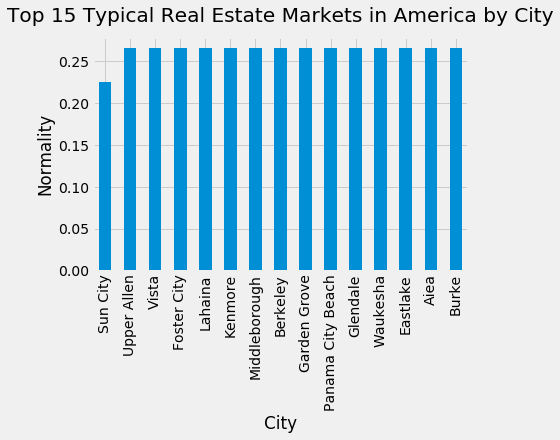

In [11]:
highly_normal = typical_property_value[['City','Normality']].sort_values(by='Normality',ascending=True)
highly_normal = highly_normal.set_index(keys='City')
ax = highly_normal.head(15).plot(kind='bar')
plt.title('Top 15 Typical Real Estate Markets in America by City', y=1.04)
plt.xlabel('City')
plt.ylabel('Normality')
ax.legend_.remove()
plt.show()

The above graph shows us the most typical real estate markets by city. We can see that the closer the value is to zero the lower the discrepancy is between the averages and the rankings by city. Sun City is found to be the most typical out of our entire list.

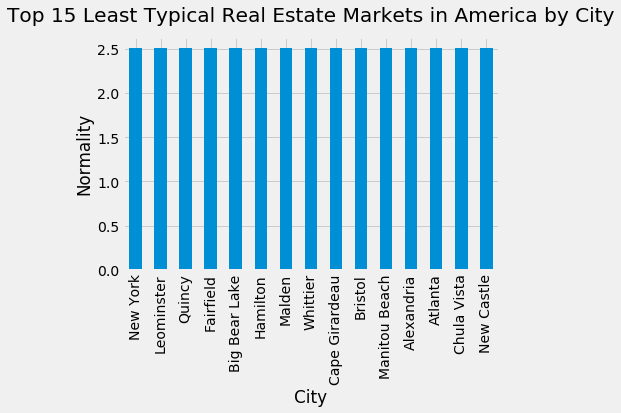

In [12]:
not_normal = typical_property_value[['City','Normality']].sort_values(by='Normality',ascending=False)
not_normal = not_normal.set_index(keys='City')
ax = not_normal.head(15).plot(kind='bar')
plt.title('Top 15 Least Typical Real Estate Markets in America by City', y=1.04)
plt.xlabel('City')
plt.ylabel('Normality')
ax.legend_.remove()
plt.show()

The above graph shows us the least typical real estate markets by city. We can see that the further the value is from zero the higher the discrepancy is between the averages and the rankings by city. New York is found to be the least typical out of our entire list.

### Property Type Pricing Trends

Now that we have concluded which real estate markets are the most and least typical we can figure out which cities have the largest pricing trends between property types.

For this part of the analysis we will want to use the Median Value per Square Foot document which is data_list[0]. We will be subtracting the most recent value subtracted by the oldest value we have on record for each city. This will give us the largest price increase as well as decrease across America to ultimately help us answer our question of where to buy a house.

In [13]:
import numpy as np

median_square_foot = data_list[0][data_list[0]['City'].isin(typical_property_value['City'].unique())].fillna(0)

def calc_price_change(row):
    
    price_data = row[median_square_foot.columns[7:]]
    beg_price = price_data[price_data > 0].head(1).iloc[0]
    end_price = price_data[price_data > 0].tail(1).iloc[0]
    return ((end_price - beg_price)/beg_price) * 100

median_square_foot['Price Change (%)'] = median_square_foot.apply(calc_price_change,axis=1)

median_square_foot.head(20)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,Price Change (%)
0,61639,10025,New York,NY,New York,New York,1,0.0,0.0,0.0,...,1306.0,1305.0,1315,1331,1342,1347,1349,1354,1360.0,145.045045
1,84654,60657,Chicago,IL,Chicago,Cook,2,134.0,134.0,133.0,...,285.0,286.0,287,288,288,289,289,290,291.0,117.164179
2,61637,10023,New York,NY,New York,New York,3,0.0,0.0,0.0,...,1600.0,1597.0,1610,1629,1650,1657,1653,1653,1660.0,64.031621
3,84616,60614,Chicago,IL,Chicago,Cook,4,149.0,150.0,150.0,...,319.0,320.0,321,323,324,324,326,328,330.0,121.476510
5,61616,10002,New York,NY,New York,New York,6,0.0,0.0,0.0,...,1319.0,1329.0,1347,1364,1384,1393,1391,1395,1405.0,93.526171
6,84640,60640,Chicago,IL,Chicago,Cook,7,110.0,109.0,107.0,...,214.0,216.0,218,219,219,218,219,220,221.0,100.909091
7,91733,77084,Houston,TX,Houston,Harris,8,38.0,38.0,37.0,...,81.0,81.0,82,83,84,84,84,84,84.0,121.052632
8,97564,94109,San Francisco,CA,San Francisco,San Francisco,9,279.0,281.0,280.0,...,1120.0,1113.0,1102,1092,1084,1079,1078,1086,1094.0,292.114695
10,62037,11226,New York,NY,New York,Kings,11,0.0,0.0,0.0,...,489.0,494.0,498,502,509,520,525,525,526.0,171.134021
11,91940,77449,Cypress,TX,Houston,Harris,12,37.0,37.0,37.0,...,82.0,83.0,84,85,86,86,86,86,86.0,132.432432


In the above printout, if we scroll to the far right we see that the 'Price Change (%)' is now the last column. This column outlines the largest and smallest price increases (or decreases). However, there are more than one entry per city here, so we need to be sure we take the average of each city before we can be sure of the price changes. In the next cell we will group all transactions by city and find the mean. Giving us a list of unique city names that have an overall average for the price change in percent.

In [14]:
unique_city_price_change = median_square_foot.groupby('City')['Price Change (%)'].mean()
print(median_square_foot[median_square_foot['City']=='New York'])
print(unique_city_price_change)

      RegionID  RegionName      City State     Metro CountyName  SizeRank  \
0        61639       10025  New York    NY  New York   New York         1   
2        61637       10023  New York    NY  New York   New York         3   
5        61616       10002  New York    NY  New York   New York         6   
10       62037       11226  New York    NY  New York      Kings        11   
12       62087       11375  New York    NY  New York     Queens        13   
14       62045       11235  New York    NY  New York      Kings        15   
19       61623       10009  New York    NY  New York   New York        20   
21       61643       10029  New York    NY  New York   New York        22   
22       61703       10128  New York    NY  New York   New York        23   
27       61802       10462  New York    NY  New York      Bronx        28   
28       61796       10456  New York    NY  New York      Bronx        29   
39       62017       11206  New York    NY  New York      Kings        40   

One thing to note is that when this average is taken by city we lose the resolution into the 'CountyName'. For example, if we were to look at New York as outlined above (scrolling to the very top) we will no longer see the difference between the counties of Kings,Queens,New York, Bronx, or Richmond. However, for our purposes we only want to look at cities across america and so removing these columns is ok as we take the average of all of these locations.

Now that we have identified the price changes, both the 15 largest increases and decreases will be plotted to allow us to visually examine the data.

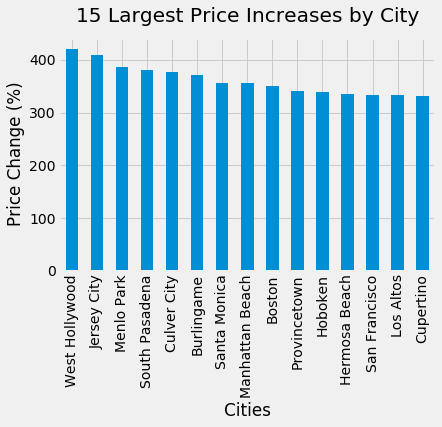

In [15]:
largest_15_increase = unique_city_price_change.sort_values(ascending=False).head(15)
ax = largest_15_increase.plot(kind='bar')
plt.title('15 Largest Price Increases by City', y=1.04)
plt.xlabel('Cities')
plt.ylabel('Price Change (%)')
plt.show()

We can see that West Hollywood has over a 400% increase in mean price per square foot. The next closest is Jersey City with slightly over a 400% increase in mean price per square foot. Now, let's look at the 15 largest price decreases by city.

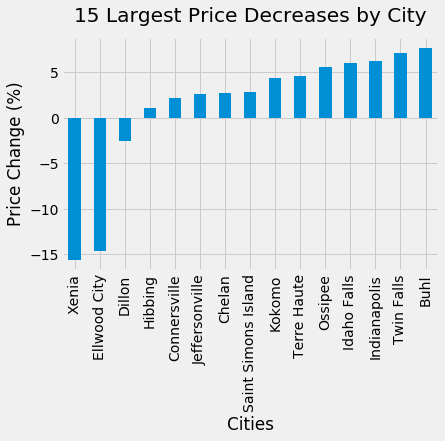

In [16]:
largest_15_decrease = unique_city_price_change.sort_values(ascending=True).head(15)
ax = largest_15_decrease.plot(kind='bar')
plt.title('15 Largest Price Decreases by City', y=1.04)
plt.xlabel('Cities')
plt.ylabel('Price Change (%)')
plt.show()

In the above graph we can see that the city with the largest decrease in mean price per square foot is Xenia which is just over a 15% decrease. The next closest is Ellwood City with a decrease in mean price per square foot of roughly 15%.

## Average Property Type Prices

We require one last piece of information before we can consolidate all information and find out which is the best location to buy a property. We need to determine how expensive each city is by calculating the average property type prices. We are going to take the average of all property type prices of a given city and create a list of most expensive to least expense and see if we can find any correlations between Price Changes, Rankings, and Average price of property types.

In [17]:
def calc_avg(row):
    property_types = row[city_rankings_nan.columns[7:]]
    return property_types.mean()
city_rankings_nan['Avg Cost'] = city_rankings_nan.apply(calc_avg, axis=1)

city_cost = city_rankings_nan[['City', 'Avg Cost']]
print(city_cost)

                           City      Avg Cost
0                      New York  7.646543e+05
1                       Chicago  3.357263e+05
2                       Houston  7.646543e+05
3                 San Francisco  3.357263e+05
4                     Nashville  3.357263e+05
5                   Los Angeles  3.275263e+05
6                    Washington  1.945660e+06
7                  Saint Peters  7.646543e+05
8                       Hoboken  3.357263e+05
9             Sunny Isles Beach  3.928980e+05
10                  Miami Beach  3.357263e+05
11                     Lakewood  7.646543e+05
12             Royal Palm Beach  7.646543e+05
13                   Long Beach  1.015051e+06
14                       Elyria  7.646543e+05
15               Virginia Beach  3.357263e+05
16                  Westminster  7.028456e+05
17                         Napa  7.028456e+05
18                      Redmond  2.131500e+05
19                 Jacksonville  3.357263e+05
20                      Bristol  7

The above is a print out of the average property type cost in a given city. To visualize this data we want to print the 30 largest cities and see what the average values are.

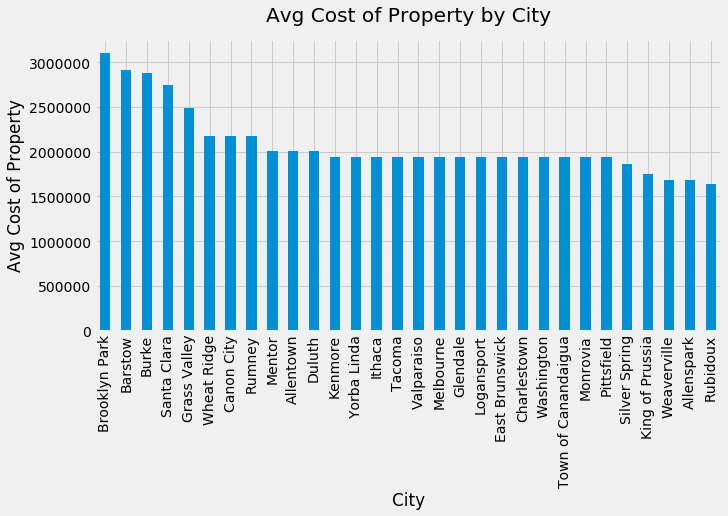

In [18]:
city_cost_sorted = city_cost.set_index(keys='City')
city_cost_sorted = city_cost_sorted.sort_values(by='Avg Cost',ascending=False).head(30)

ax = city_cost_sorted.plot(kind='Bar',figsize=(10,5))

plt.title('Avg Cost of Property by City', y=1.04)
plt.xlabel('City')
plt.ylabel('Avg Cost of Property')
ax.legend().set_visible(False)
plt.show()

Now that we know the relative cost of property types are within given cities we can start using all of the data we have gathered to determine where we want to buy a house. First, we want to buy a property in a city that has been steadily increasing in price. Here we can use our price increase data.

## Choosing a Location and Property Type to Buy

In order to choose the location where we want to buy a house we first need to make sure our criteria from the introduction will be met. As a reminder, this is the criteria:

- We want to buy in a location that is steadily increasing in price, allowing us to hopefully make a profit when it is sold
- We want to determine which housing types are mispriced within this city, the further the misprice, the better the deal may be
- Due to budgetary reasons, we want to buy in a relatively cheap city

If we scroll up we can see that there are a few locations that have been steadily increasing. Let's look at the top 15 cities that have been increasing and see if any fit our requirements. 

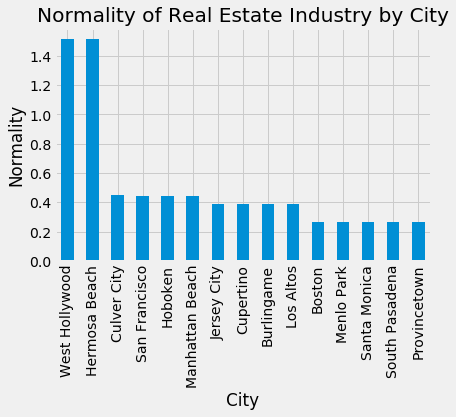

In [19]:
sorted_increasing = typical_property_value[typical_property_value['City'].isin(largest_15_increase.index)].sort_values(by='Normality',ascending=False)

ax = sorted_increasing.plot(kind='bar',x='City',y='Normality')
plt.title('Normality of Real Estate Industry by City')
plt.ylabel('Normality')
ax.legend_.remove()
plt.show()


In this graph we can see that West Hollywood and Hermosa Beach are the two cities that have the least typical real estate industries. Now, let's explore what the average price of property is at these two locations.

In [20]:
print(city_cost[city_cost['City'].isin(['West Hollywood', 'Hermosa Beach'])])

               City  Avg Cost
402  West Hollywood   83600.0
750   Hermosa Beach   99550.0


We can see that both of these prices are quite reasonable for an average property type price when looking at our 30 largest prices. The largest average price came in over 300,000. Both of these prices are under half of that largest price. Because of this, we may want to choose Hermosa Beach as it's average price is less than the average price of properties in West Hollywood.

Finally to choose what type of property we will want to buy we will have to look at ranking types and compare it to the national average.

In [21]:
print(typical_property_value[typical_property_value['City'] == 'Hermosa Beach'],'\n')
print('The average ranking is: \n', mean_property_rank)


              City State                           Metro  1 Bedroom  \
750  Hermosa Beach    CA  Los Angeles-Long Beach-Anaheim        5.0   

     2 Bedroom  3 Bedroom  4 Bedroom  5 Bedroom  Condominium  Single Family  \
750        3.0        2.0        1.0        6.0          4.0            NaN   

     Normality  
750   1.518182   

The average ranking is: 
 1 Bedroom        5.525692
2 Bedroom        4.300395
3 Bedroom        3.027273
4 Bedroom        2.022925
5 Bedroom        1.445455
Condominium      4.678261
Single Family         NaN
dtype: float64


We can see here that a 4 bedroom property is actually the most expensive at Hermosa Beach, while a 5 bedroom property type is the least expensive, as no data was provided for this city.

In [22]:
print(city_prices[city_prices['City'] == 'Hermosa Beach'])

              City State                           Metro  1 Bedroom  \
750  Hermosa Beach    CA  Los Angeles-Long Beach-Anaheim        5.0   

     2 Bedroom  3 Bedroom  4 Bedroom  5 Bedroom  Condominium  Single Family  \
750        3.0        2.0        1.0        6.0          4.0            NaN   

     Normality  
750   1.518182  


One generalization we should be able to make is that if we had data for the 5 bedroom property type, it would almost certainly be the most expensive. This would then lead us to the following conclusions:

1 Bedroom        7
2 Bedroom        5
3 Bedroom        3
4 Bedroom        2
5 Bedroom        1
Condominium      6
Single Family    4

Let's look at the differences between this new assumed value and the mean property type ranking.

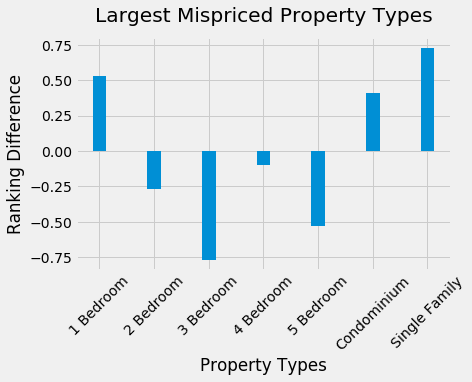

In [23]:
# This diff list is the difference between the assumed value and the mean property type.
diff = [7-6.47,5-5.27,3-3.77,2-2.10,1-1.53,6-5.59,4-3.27]

property_types = ['1 Bedroom','2 Bedroom', '3 Bedroom', '4 Bedroom', '5 Bedroom', 'Condominium', 'Single Family']

fig,ax = plt.subplots()
ax.bar([1,2,3,4,5,6,7],diff,width=0.25)
plt.title('Largest Mispriced Property Types', y=1.04)
plt.xlabel('Property Types')
plt.ylabel('Ranking Difference')
plt.xticks([1,2,3,4,5,6,7],property_types,rotation=45)
plt.show()

In this graph we can see that the largest positive difference refers to Single Family property. We now know that the best deal is the Single Family home when compared to the national average in the city of Hermosa Beach

## Conclusion


In conclusion, we have found that the best property type and location to purchase is a Single Family Home in Hermosa Beach, California. The reason for this is because it fits our criteria to a 'T'. It's pricing trend has been steadily increasing. It is relatively cheap compared to the national averages. Lastly, we have found that the Single Family Property is the largest mispriced property compared to National average in this location.